In [1]:
from sklearn import datasets
from polyssifier import poly, plot
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_classification
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

(500, 2)
(500,)


Using Theano backend.


AttributeError: 'itertools.starmap' object has no attribute 'pop'

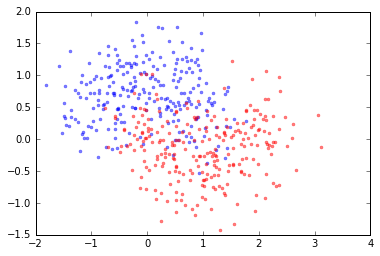

In [2]:
data, label = make_moons(n_samples=500, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.', alpha=.5);
plt.plot(data[label1,0], data[label1,1],'r.', alpha=.5);
scores, confusions, predictions = poly(data,label, n_folds=2, verbose=False, save=False, scale=True,
                                       feature_selection=False, scoring='auc', concurrency=1)
plot(scores)

                                 mean       std       min       max
Multilayer Perceptron train  0.900533  0.014499  0.890462  0.917151
                      test   0.898679  0.029068  0.865144  0.916673
Nearest Neighbors     train  0.967030  0.005175  0.961662  0.971988
                      test   0.951771  0.018009  0.930976  0.962286
SVM                   train  0.954812  0.002531  0.953247  0.957732
                      test   0.947236  0.017027  0.928968  0.962665
Linear SVM            train  0.904527  0.015106  0.893160  0.921669
                      test   0.903085  0.030651  0.868263  0.925979
Decision Tree         train  1.000000  0.000000  1.000000  1.000000
                      test   0.810926  0.022787  0.786614  0.831794
Random Forest         train  0.999928  0.000092  0.999824  1.000000
                      test   0.933396  0.024448  0.905411  0.950599
Logistic Regression   train  0.904779  0.014954  0.893223  0.921669
                      test   0.903253  0.030552 

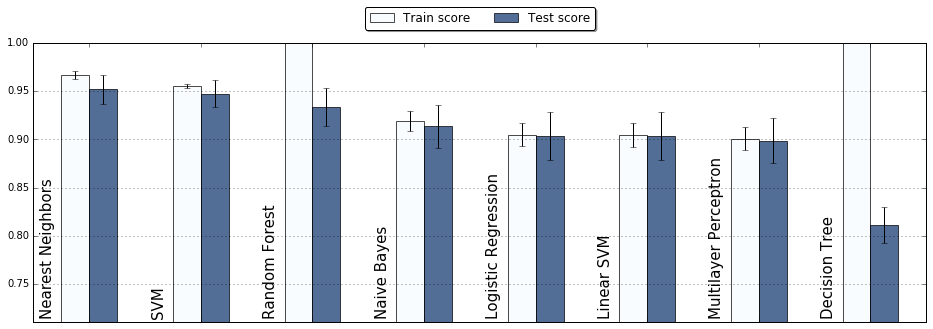

In [5]:
data, label = make_classification(n_samples=1000, n_features=20,
                                      n_informative=5, n_redundant=2,
                                      n_repeated=0, n_classes=2,
                                      n_clusters_per_class=2, weights=None,
                                      flip_y=0.01, class_sep=1.0,
                                      hypercube=True, shift=0.0,
                                      scale=1.0, shuffle=True,
                                      random_state=None)
scores, confusions, predictions = poly(data, label, n_folds=3, verbose=True,
                                       feature_selection=True, save=False, concurrency=4)
plot(scores)

In [12]:
for key, val in confusions.items():
    print(key)
    print(val)

Nearest Neighbors
[[ 225.   25.]
 [  45.  205.]]
Naive Bayes
[[ 208.   42.]
 [  40.  210.]]
Decision Tree
[[ 197.   53.]
 [  55.  195.]]
Logistic Regression
[[ 209.   41.]
 [  39.  211.]]
Linear SVM
[[ 209.   41.]
 [  39.  211.]]
Random Forest
[[ 207.   43.]
 [  47.  203.]]
SVM
[[ 214.   36.]
 [  45.  205.]]
Multilayer Perceptron
[[ 190.   60.]
 [  25.  225.]]


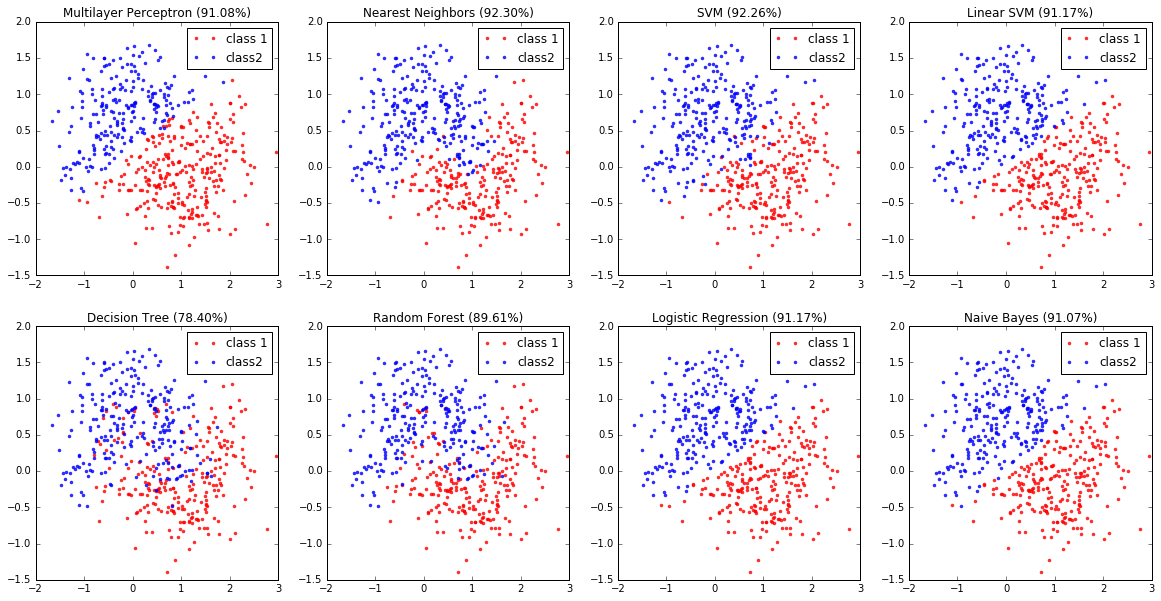

In [13]:
plt.figure(figsize=(20, 10))
for n, (key, pred) in enumerate(predictions.items()):
    plt.subplot(2,4,n+1)
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(scores[key]['test']) ))